#Task1: Convert original image into sketch image using opencv

---



---



In [ ]:
pip install opencv-python


In [ ]:
import cv2


In [ ]:
# Load your image (replace 'your_image.jpg' with your file name)
image = cv2.imread('babashaheb.jpg')

# Resize (optional — just to make it easier to view)
image = cv2.resize(image, (300, 300))

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
inverted_image = cv2.bitwise_not(gray_image)
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)
inverted_blur = cv2.bitwise_not(blurred)

In [ ]:
pencil_sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)

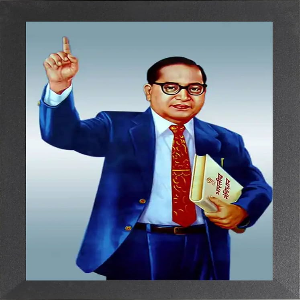

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)

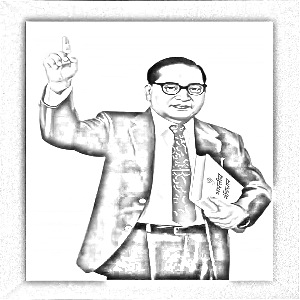

In [ ]:
cv2_imshow(pencil_sketch)

Task2: Convert original image into sketch image without using opencv

---



---



In [ ]:
from PIL import Image, ImageOps, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()  # Choose an image from your device
image_path = list(uploaded.keys())[0]

Saving lake image.jpg to lake image.jpg


In [ ]:
image = Image.open(image_path).convert("RGB")

In [ ]:
gray = ImageOps.grayscale(image)

In [ ]:
inverted = ImageOps.invert(gray)

In [ ]:
blurred = inverted.filter(ImageFilter.GaussianBlur(radius=12))

In [ ]:
gray_array = np.array(gray, dtype=float)
blur_array = np.array(blurred, dtype=float)


In [ ]:
pencil_sketch = 255 * (gray_array / (255 - blur_array + 1e-6))
pencil_sketch = np.clip(pencil_sketch, 0, 255).astype(np.uint8)

In [ ]:

sketch_image = Image.fromarray(pencil_sketch)

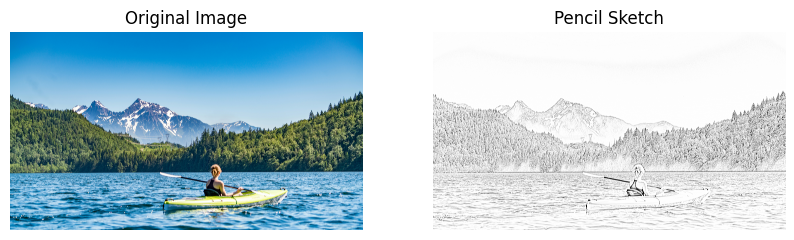

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Pencil Sketch")
plt.imshow(sketch_image, cmap="gray")
plt.axis("off")

plt.show()

Task3: Convert an image into  oil painting styles


---





🧩Method 1: Using OpenCV’s Built-in Oil Painting Filter

In [1]:
!pip install opencv-contrib-python


Saving lake1 to lake1 (3)


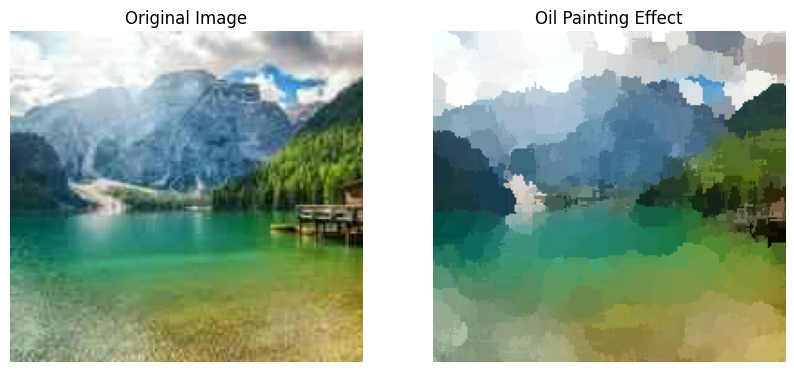

In [5]:
# --- Import libraries ---
import cv2
from google.colab import files
import matplotlib.pyplot as plt

# --- Upload image ---
uploaded = files.upload()

# --- Read image ---
for filename in uploaded.keys():
    image = cv2.imread(filename)

# Convert BGR (OpenCV) to RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Oil painting effect ---
oil_paint = cv2.xphoto.oilPainting(image, size=7, dynRatio=1)
oil_paint_rgb = cv2.cvtColor(oil_paint, cv2.COLOR_BGR2RGB)

# --- Display side by side ---
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Oil painting effect
plt.subplot(1, 2, 2)
plt.imshow(oil_paint_rgb)
plt.title("Oil Painting Effect")
plt.axis("off")

plt.show()


🧩 Method 2: Deep Learning Style Transfer (PyTorch)

In [11]:
!pip install torch torchvision Pillow requests matplotlib

In [12]:
from PIL import Image
import torch
from torchvision import transforms
from torchvision.transforms.functional import gaussian_blur, adjust_saturation
import matplotlib.pyplot as plt
from google.colab import files
import io

In [13]:
uploaded = files.upload()

Saving pexels.jpg to pexels.jpg


In [14]:
for filename in uploaded.keys():
    content_image = Image.open(io.BytesIO(uploaded[filename])).convert('RGB')
    print("✅ Image uploaded:", filename)

✅ Image uploaded: pexels.jpg


In [15]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

img_tensor = transform(content_image).unsqueeze(0)

In [16]:
stylized_tensor = adjust_saturation(gaussian_blur(img_tensor, 3), 1.5)

In [17]:
stylized_image = transforms.ToPILImage()(stylized_tensor.squeeze(0))


In [18]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

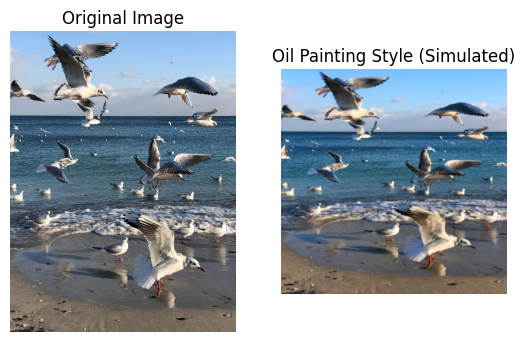

In [26]:
plt.subplot(1, 2, 1)
plt.imshow(content_image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(stylized_image)
plt.title("Oil Painting Style (Simulated)")
plt.axis("off")

plt.show()